<a href="https://colab.research.google.com/github/Aleksanderprofic/Machine-Learning/blob/master/Regression/RandomForestRegression/sklearn/random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Data loading and data visualisation <a name="dladv"></a>



### Data loading <a name="dl"></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Data Visualisation

#### Position Level vs Salary

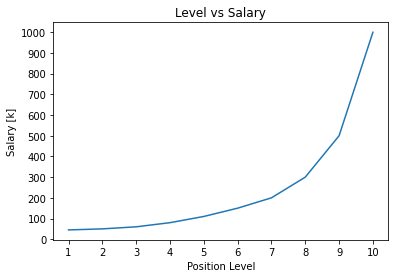

In [27]:
plt.plot(dataset.Level, dataset.Salary / 1000)
plt.title('Level vs Salary')
plt.xlabel('Position Level')
plt.yticks(range(0, 1001, 100))
plt.xticks(range(1, 11))
plt.ylabel('Salary [k]')
plt.show()

In [28]:
dataset.Level.corr(dataset.Salary)

0.8179494074776199

*Strong Correlation between Level and Salary*

## Data preprocessing <a name="dp"></a>

### Extracting dependent and independent variables <a name="edaiv"></a>

In [32]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [33]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [34]:
y = y.reshape(-1, 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Training and results visualisation

### Training the Random Forest Regression model on the whole Training set

In [35]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10)
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Predicting a new result

In [36]:
regressor.predict([[6.5]])

array([176000.])

### Visualising the Random Forest Regression results (for higher resolution and smoother curve)

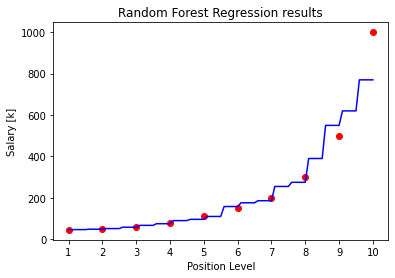

In [37]:
X_smoother = np.arange(min(X), max(X) + 0.1, 0.1).reshape(-1, 1)

plt.title('Random Forest Regression results')
plt.xlabel('Position Level')
plt.ylabel('Salary [k]')
plt.xticks(range(11))
plt.scatter(X, y / 1000, color='red')
plt.plot(X_smoother, regressor.predict(X_smoother) / 1000, color='blue')
plt.show()